In [ ]:
# Develop a DCGAN model for CIFAR-10 small object Photograph Dataset, for implement this model -
create a generator and discriminator model and then generate the new set of fake images 
to ensure the GAN outcome.

In [14]:
from IPython.display import Image
%matplotlib inline

In [15]:
#Load the dataset
from keras.datasets.cifar10 import load_data
(xtrain,ytrain),(xtest,ytest)=load_data()
print('Train Shape:\t',xtrain.shape,ytrain.shape)
print()
print('Test Shape:\t',xtest.shape,ytest.shape)


Train Shape:	 (50000, 32, 32, 3) (50000, 1)

Test Shape:	 (10000, 32, 32, 3) (10000, 1)


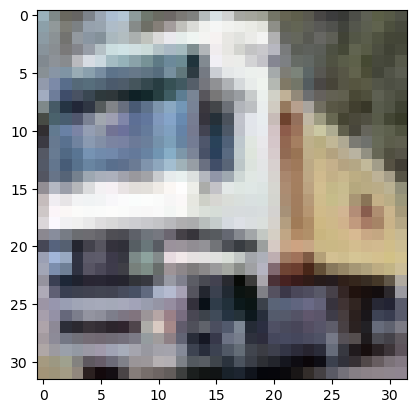

In [16]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[1],cmap='Reds')


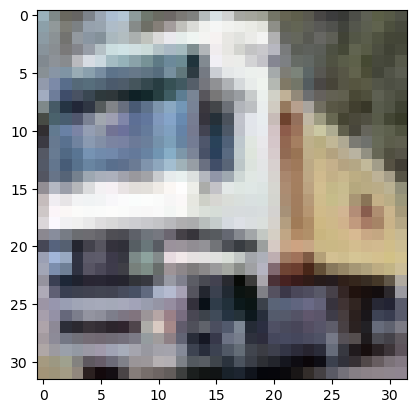

In [17]:
plt.imshow(xtrain[1],cmap='Reds')


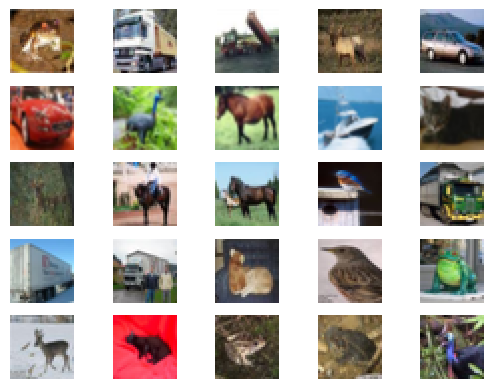

In [18]:
for i in range(25):
 plt.subplot(5,5,1+i)
 plt.axis('off')
 plt.imshow(xtrain[i],cmap='Reds')
plt.show()


In [19]:
#Import all required libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,Flatten,Dropout
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.utils import plot_model

# Build Discriminator Model:

inputs: 28 * 28 pixels in size
Output: Binary classification(real/fake)

In [64]:
def discriminator(in_shape=(32,32,3)):
    model=Sequential()
   
   
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same',
                     input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    
    model.add(Flatten())
    
    
    model.add(Dense(1,activation='sigmoid'))
    
    
    opt=Adam(learning_rate=0.0002,beta_1=0.5)
    
    model.compile(loss='binary_crossentropy',optimizer=opt,
                  metrics=['accuracy'])
                  
    return model
                  
model=discriminator()
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        1792      
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 8, 8, 64)          0         
                                                                 
 dropout_9 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten_4 (Flatten)         (None, 4096)             

# Load & prepare the mnist training images

In [65]:
from numpy import expand_dims,ones,zeros
def load_real_samples():
    (xtrain,_),(_,_)=load_data()
    x=expand_dims(xtrain,axis=-1)
    x=x.astype('float32')
    x=x/255.
    return x

In [66]:
load_real_samples()

array([[[[[0.23137255],
          [0.24313726],
          [0.24705882]],

         [[0.16862746],
          [0.18039216],
          [0.1764706 ]],

         [[0.19607843],
          [0.1882353 ],
          [0.16862746]],

         ...,

         [[0.61960787],
          [0.5176471 ],
          [0.42352942]],

         [[0.59607846],
          [0.49019608],
          [0.4       ]],

         [[0.5803922 ],
          [0.4862745 ],
          [0.40392157]]],


        [[[0.0627451 ],
          [0.07843138],
          [0.07843138]],

         [[0.        ],
          [0.        ],
          [0.        ]],

         [[0.07058824],
          [0.03137255],
          [0.        ]],

         ...,

         [[0.48235294],
          [0.34509805],
          [0.21568628]],

         [[0.46666667],
          [0.3254902 ],
          [0.19607843]],

         [[0.47843137],
          [0.34117648],
          [0.22352941]]],


        [[[0.09803922],
          [0.09411765],
          [0.08235294]],

    

In [67]:
from numpy.random import rand,randint

In [45]:
# generate n fake samples with class labels
def generate_fake_samples(n_samples):
    x=rand(32*32*3*n_samples)
 
    x=x.reshape(n_samples,32,32,3)
 
    #generate fake class labels
    y=zeros((n_samples,1))
 
    return x,y

In [46]:
generate_fake_samples(10)

(array([[[[5.27502870e-01, 6.13372770e-01, 8.65452761e-02],
          [5.53621647e-01, 9.32160551e-01, 5.58596101e-01],
          [1.89431651e-01, 9.71686269e-01, 8.26385185e-01],
          ...,
          [8.85950674e-01, 7.54149375e-01, 9.04064177e-01],
          [3.47647737e-01, 3.64554991e-01, 5.18673742e-01],
          [4.08638497e-01, 9.45749205e-01, 6.20524049e-01]],
 
         [[1.02259809e-01, 3.23107823e-01, 7.46113823e-01],
          [8.62538672e-01, 2.20736202e-02, 9.60279323e-01],
          [2.92668710e-02, 6.70278214e-01, 4.83092797e-02],
          ...,
          [9.36933184e-01, 8.50684885e-01, 2.46219874e-01],
          [1.63135391e-01, 3.39603353e-01, 5.93409121e-01],
          [1.78808332e-01, 5.09470012e-01, 3.72503533e-01]],
 
         [[6.67685479e-01, 1.53721624e-01, 5.61737964e-01],
          [5.91496178e-01, 7.75846578e-01, 6.12164490e-01],
          [6.42027022e-01, 7.10712007e-01, 5.64842361e-01],
          ...,
          [9.60376497e-02, 7.17690788e-01, 1.6069

# Train the Discriminator model

In [68]:
def train_discriminative(model,dataset,n_iter=100,n_batch=256):
    half_batch=int(n_batch//2)
    
    for i in range(n_iter):
        
        xreal,yreal=generate_real_samples(dataset,half_batch)
        
       
        AA,real_acc=model.train_on_batch(xreal,yreal)
        
        
        xfake,yfake=generate_fake_samples(half_batch)
        
        
        BB,fake_acc=model.train_on_batch(xfake,yfake)
        
        
        print('>%d real=%.0f%% fake=%.0f%%'%(i+1,real_acc*100,fake_acc*100))

In [69]:
from numpy.random import rand,randint

def generate_real_samples(dataset,n_samples):
    ix=randint(0,dataset.shape[0],n_samples)
    x=dataset[ix]
   
    y=ones((n_samples,1))
    return x,y

In [70]:
#define the discriminator model
model=discriminator()
#load image data
dataset=load_real_samples()


# Train the model


In [71]:
train_discriminator(model,dataset)




>1 real=33% fake=33%
>2 real=100% fake=0%
>3 real=67% fake=0%
>4 real=0% fake=33%
>5 real=67% fake=33%
>6 real=33% fake=67%
>7 real=67% fake=33%
>8 real=67% fake=67%
>9 real=67% fake=67%
>10 real=33% fake=67%
>11 real=0% fake=67%
>12 real=33% fake=67%
>13 real=0% fake=100%
>14 real=0% fake=67%
>15 real=33% fake=0%
>16 real=0% fake=67%
>17 real=67% fake=100%
>18 real=33% fake=67%
>19 real=0% fake=67%
>20 real=67% fake=67%
>21 real=33% fake=67%
>22 real=33% fake=67%
>23 real=0% fake=67%
>24 real=67% fake=67%
>25 real=33% fake=67%
>26 real=0% fake=67%
>27 real=0% fake=100%
>28 real=33% fake=67%
>29 real=33% fake=67%
>30 real=33% fake=100%
>31 real=33% fake=100%
>32 real=0% fake=100%
>33 real=0% fake=100%
>34 real=0% fake=100%
>35 real=67% fake=67%
>36 real=33% fake=100%
>37 real=67% fake=100%
>38 real=33% fake=100%
>39 real=33% fake=67%
>40 real=33% fake=100%
>41 real=67% fake=67%
>42 real=33% fake=67%
>43 real=33% fake=100%
>44 real=0% fake=100%
>45 real=0% fake=100%
>46 real=33% fake=

# Generator model

In [67]:
from keras.layers import Reshape
from keras.layers import Conv2DTranspose
# define the standalone generator model
def generator(latent_dim):
 model = Sequential()
 # foundation for 7x7 image
 n_nodes = 128 * 7 * 7
 model.add(Dense(n_nodes, input_dim=latent_dim))
 model.add(LeakyReLU(alpha=0.2))
 model.add(Reshape((7, 7, 128)))
 # upsample to 14x14
 model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
 model.add(LeakyReLU(alpha=0.2))
 # upsample to 28x28
 model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
 model.add(LeakyReLU(alpha=0.2))
 model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
 return model


In [68]:
# define the size of the latent space
latent_dim = 100
# define the generator model
model = generator(latent_dim)
# summarize the model
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 128)       262272    
 anspose)                                                        
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 128)       262272    
 Transpose)                                           

In [69]:
import numpy as np
from numpy.random import randn
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
 # generate points in the latent space
 x_input = randn(latent_dim * n_samples)
 # reshape into a batch of inputs for the network
 x_input = x_input.reshape(n_samples, latent_dim)
 return x_input


In [70]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
 # generate points in latent space
 x_input = generate_latent_points(latent_dim, n_samples)
 # predict outputs
 X = g_model.predict(x_input)
 # create ✬fake✬ class labels (0)
 y = zeros((n_samples, 1))
 return X, y

1/1 [==============================] - 2s 2s/step


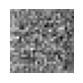

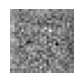

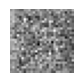

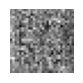

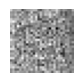

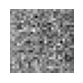

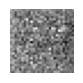

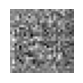

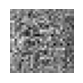

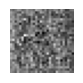

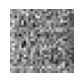

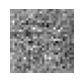

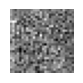

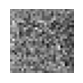

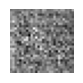

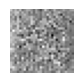

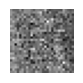

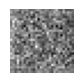

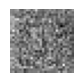

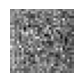

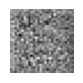

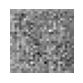

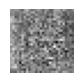

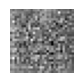

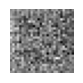

In [72]:
# size of the latent space
latent_dim = 100
# define the discriminator model
model = generator(latent_dim)
# generate samples
n_samples = 25
x, _ = generate_fake_samples(model, latent_dim, n_samples)
# plot the generated samples
for i in range(n_samples):
 # define subplot
 plt.subplot(5, 5, 1 + i)
 # turn off axis labels
 plt.axis('off')
 # plot single image
 plt.imshow(x[i, :, :, 0], cmap='gray_r')
 # show the figure
 plt.show()